# iMoLD在LECI框架上的复现

## 说明

此为本人关于课程《数据科学与工程导论》的期末大作业。

本项目将iMoLD在LECI框架上转移复现。

iMoLD是*Learning Invariant Molecular Representation in Latent Discrete Space*提出的一种用于解决图分布外泛化(out-of-distribution, OOD)的图神经网络(graph nerual network, GNN)架构。该架构专注于分子图的OOD问题，在用于验证的现实世界分子图上具有良好的表现。

LECI则是*Joint Learning of Label and Environment Causal Independence for Graph Out-of-Distribution Generalization*提出的一种用于解决OOD问题的对抗性训练策略。该策略从图结构的特点出发，指出了结合标签和环境因果独立性(label and environment causal independence, LECI)，可以有效识别因果子图与不变子图。该论文给出的代码中包含了他们用于与多种模型架构进行比较的一个广泛的框架，**而本项目的主要工作就是将iMoLD纳入了该框架，使其可以在LECI框架下运行，实现与LECI的比较或提供更加宽泛的用途。**

## 参考

*Learning Invariant Molecular Representation in Latent Discrete Space*: https://openreview.net/forum?id=r9fzp8eyhZ

*Joint Learning of Label and Environment Causal Independence for Graph Out-of-Distribution Generalization*: https://arxiv.org/abs/2306.01103

## 研究背景

图的OOD问题越来越成为人们关注的重点。这不仅得益于图结构本身的潜力，也得益于GNN在医药、金融、生物甚至物理等领域的广泛应用。例如，采用GNN对分子进行研究已经取得了一定进展，可在Covid-19爆发时，基于人工智能的新药研发并未取得突出的成效；其中虽有各方面的原因，但图的OOD问题无疑是其中的主要障碍之一。如何让GNN在面对训练和测试时未曾见过的数据时仍具有良好的表现，已经成为GNN研究领域一个绕不开的话题。

解决OOD问题听起来很复杂，实质上就是不断提高GNN在各类环境中的泛化能力。目前在这方面的研究，主要分为三类方法。

- Group Distributionally Robust Optimization (gDRO):
gDRO 是一种优化框架，旨在提高模型对于分布变化的鲁棒性。在 gDRO 中，不仅考虑单一的分布，而是考虑一个分布的集合，使模型对于整个分布集合都保持鲁棒。通过考虑分布集合，gDRO 可以使模型更加关注于共性的特征，减少对于特定分布的过度拟合。这有助于提高模型在未见过的分布上的泛化性能，因为模型在训练时被迫考虑多个可能的分布。

- Domain Adaptation（领域自适应）:
领域自适应旨在解决由于训练和测试数据分布不匹配而导致的泛化性能下降问题。领域自适应方法试图通过在源领域（训练数据）和目标领域（测试数据）之间进行知识转移来提高模型的泛化能力。通过对源领域和目标领域之间的分布差异进行建模和适应，领域自适应方法可以减轻模型在目标领域中的过拟合程度。这有助于模型更好地适应未见过的领域，提高在 OOD 数据上的表现。

- Invariant Learning（不变学习）:
不变学习旨在通过学习对于输入变化不敏感的表示，提高模型的不变性。在图像领域，这可能包括对于不同角度、光照等因素的不变性。通过学习不变的表示，模型可以更好地适应输入数据中的变化，而不会受到某些因素的影响。这有助于提高模型对于 OOD 数据的泛化能力，因为模型学到了更加通用的特征。

这三种方法对于 OOD 问题的有效性主要体现在它们在训练过程中考虑了分布的变化、领域的不匹配以及对于变化的不敏感性。通过考虑这些因素，模型更有可能在未见过的环境中表现出鲁棒性和泛化性能，从而提高在 OOD 数据上的效果。

## 研究意义

从不标准的分类上来说，iMoLD属于Invariant Learning。它提出了一种“先编码，再分离”的架构，使得在复杂的分子上进行子图的分离也具有较高的准确性；而一般的“先分离，再编码”的架构，在分离的时候可能因为分子的复杂性或某些特殊分子本身的性质，本身就无法进行较准确的分离。iMoLD在18个基于现实世界的分子图数据集上取得了优秀的效果。

![Screenshot 2024-01-20 191619.png](<attachment:Screenshot 2024-01-20 191619.png>)

而LECI策略则在训练时不止考虑标签信息，更考虑了跟环境有关的环境因果独立性。通过引入环境因果独立性，能够使GNN在学习时不仅考虑标签信息，更能根据环境因果独立性学习到所学内容与环境的关联性，尽可能地学习并保留不变表征，摒弃环境信息。同时，对抗性训练策略也令其具有更好的泛化性。

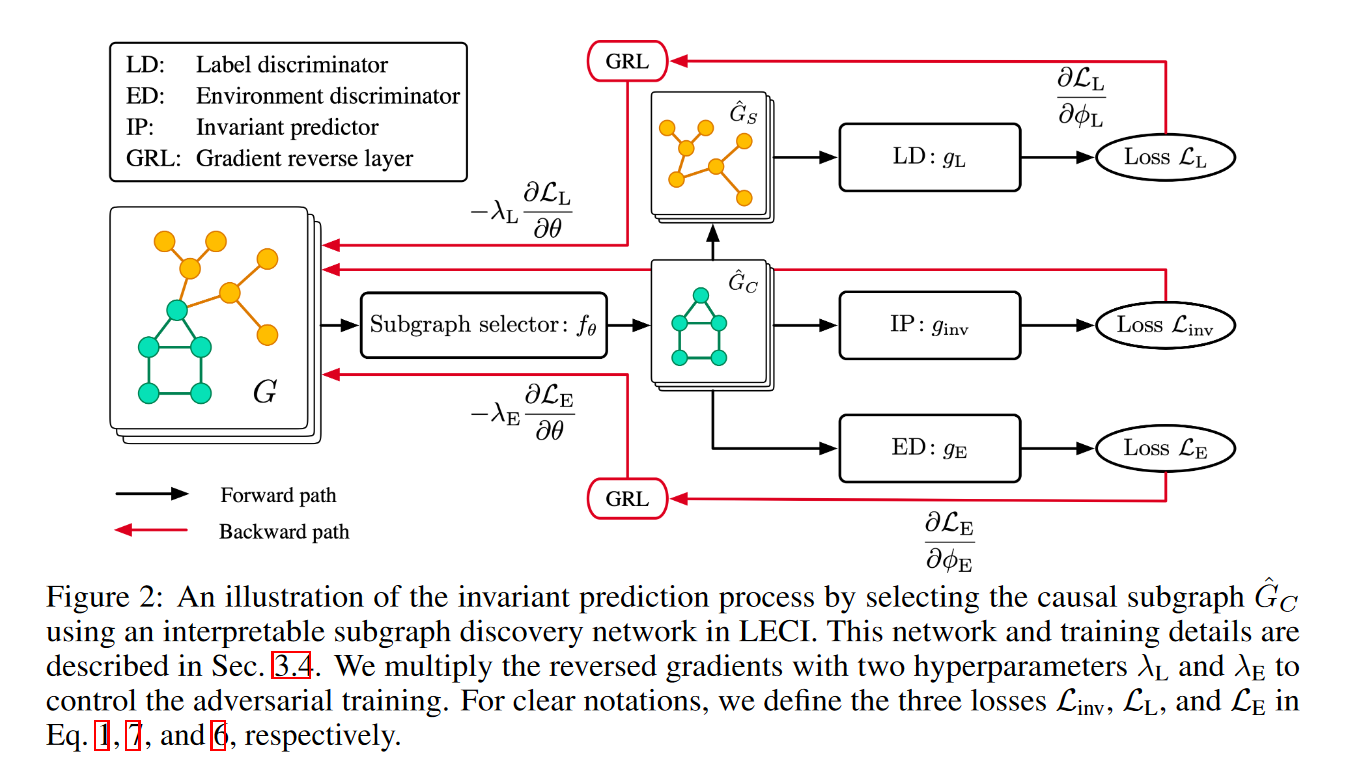

原本的LECI策略，为了基于各种baselines对它们的实验结果进行验证，给出了一个较为广泛的框架，其中兼容了各类现存的架构。而iMoLD作为一个同期(NeurIPS 2023)提出的架构，并未被作为baseline。因此，通过将iMoLD纳入这一框架，并比较二者在不同数据集上的表现具有重大的意义。这不仅能为OOD的影响因素提供重要参考，也能基于比较结果，对现有方法提出改进。
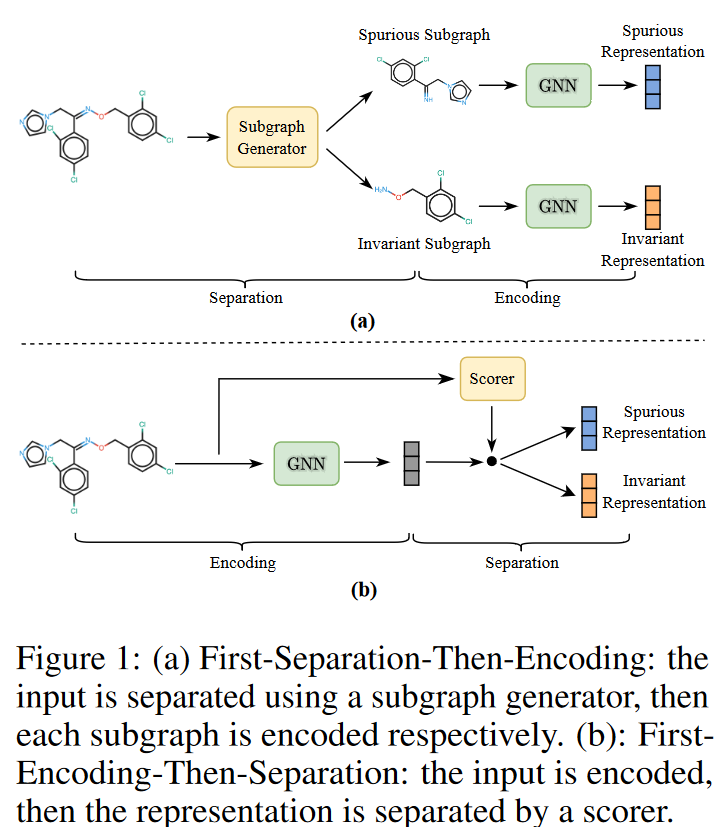

## 复现流程

LECI在原论文中给出了他们的实现代码，在 https://github.com/divelab/LECI 中即可查看。根据描述，他们给出的baselines包括ERM、IRM、VREx等一些列经典的baselines，包含传统的OOD评估基准以及较新的OOD评估基准。

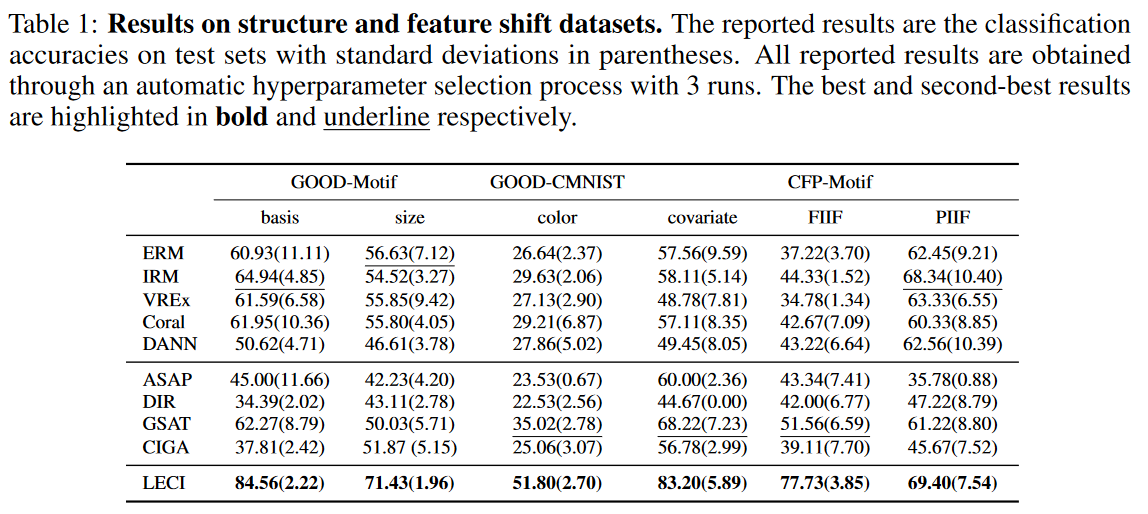

可以看到，其中是没有包含iMoLD的。在官方代码中，我们也能看到现有的baselines的实现代码。(下图给出的是LECI官方代码的模型目录)

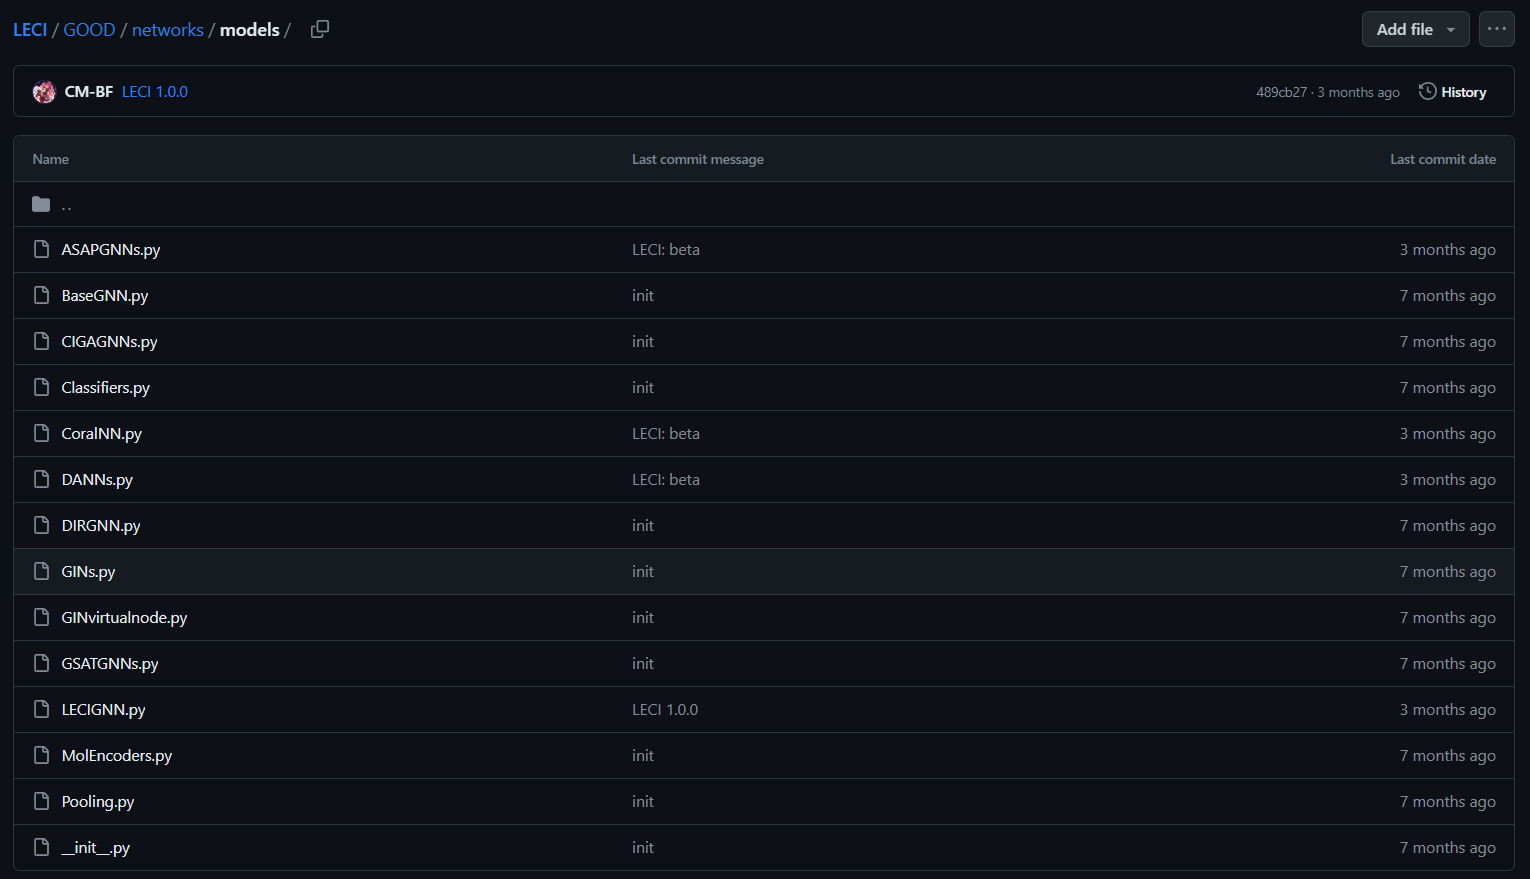

### 模型架构
iMoLD也给出了他们的官方代码: https://github.com/HICAI-ZJU/iMoLD. 里面给出了基于`pytorch`编写的iMoLD架构，因此我们可以直接拿来利用。

以下给出了模型的Layers:
```python
import torch
from torch import nn
from torch_geometric.nn import MessagePassing
import torch.nn.functional as F
from torch_geometric.nn import global_mean_pool, global_add_pool
from ogb.graphproppred.mol_encoder import AtomEncoder, BondEncoder
from torch_geometric.utils import degree

import math

class MLP(nn.Module):

class GINConv(MessagePassing):

class GCNConv(MessagePassing):

class GNN_node(torch.nn.Module):

class GNN_node_Virtualnode(torch.nn.Module):

if __name__ == "__main__":
pass
```
注意:此处省略了具体的代码，可在 https://github.com/HICAI-ZJU/iMoLD/tree/main/models 上查看源代码或查看下文适配在LECI框架中的iMoLD代码。

以下代码通过几个类将layers整合起来，构成完整的model:
```python
import torch
from torch import nn
import torch.nn.functional as F
from torch_geometric.nn import global_mean_pool
from torch_scatter import scatter_add, scatter_mean
import numpy as np

from GOOD.networks.models.GINs import GINFeatExtractor
from GOOD.networks.models.GINvirtualnode import vGINFeatExtractor

from vector_quantize_pytorch import VectorQuantize
# from .vq_update import VectorQuantize

from .gnnconv import GNN_node

class Separator(nn.Module):

class DiscreteEncoder(nn.Module):

class MyModel(nn.Module):
```
注意，此栏同样省略了具体的代码。

要将其整合，以适配LECI的框架。因此，对代码进行一定修改，最后得到以下完整代码:

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch_geometric.nn import global_mean_pool
from torch_scatter import scatter_add, scatter_mean
import numpy as np

from GOOD.networks.models.GINs import GINFeatExtractor
from GOOD.networks.models.GINvirtualnode import vGINFeatExtractor

from vector_quantize_pytorch import VectorQuantize
# from .vq_update import VectorQuantize

from torch_geometric.nn import MessagePassing
from torch_geometric.utils import degree
from torch_geometric.nn import global_mean_pool, global_add_pool


class MLP(nn.Module):
    """MLP with linear output"""

    def __init__(self, num_layers, input_dim, hidden_dim, output_dim):
        """MLP layers construction

        Paramters
        ---------
        num_layers: int
            The number of linear layers
        input_dim: int
            The dimensionality of input features
        hidden_dim: int
            The dimensionality of hidden units at ALL layers
        output_dim: int
            The number of classes for prediction

        """
        super(MLP, self).__init__()
        self.linear_or_not = True  # default is linear model
        self.num_layers = num_layers
        self.output_dim = output_dim

        if num_layers < 1:
            raise ValueError("number of layers should be positive!")
        elif num_layers == 1:
            # Linear model
            self.linear = nn.Linear(input_dim, output_dim)
        else:
            # Multi-layer model
            self.linear_or_not = False
            self.linears = torch.nn.ModuleList()
            self.batch_norms = torch.nn.ModuleList()

            self.linears.append(nn.Linear(input_dim, hidden_dim))
            for _ in range(num_layers - 2):
                self.linears.append(nn.Linear(hidden_dim, hidden_dim))
            self.linears.append(nn.Linear(hidden_dim, output_dim))

            for _ in range(num_layers - 1):
                self.batch_norms.append(nn.BatchNorm1d(hidden_dim))

    def forward(self, x):
        if self.linear_or_not:
            # If linear model
            return self.linear(x)
        else:
            # If MLP
            h = x
            for i in range(self.num_layers - 1):
                h = F.relu(self.batch_norms[i](self.linears[i](h)))
            return self.linears[-1](h)


# GIN convolution along the graph structure
class GINConv(MessagePassing):
    def __init__(self, emb_dim):
        '''
            emb_dim (int): node embedding dimensionality
        '''

        super(GINConv, self).__init__(aggr="add")

        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(emb_dim, 2 * emb_dim),
            torch.nn.BatchNorm1d(2 * emb_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(2 * emb_dim, emb_dim)
        )
        self.eps = torch.nn.Parameter(torch.Tensor([0]))
        # if datatype == 'ogb':
        #     self.bond_encoder = BondEncoder(emb_dim=emb_dim)
        # else:
        self.bond_encoder = MLP(num_layers=1, input_dim=10, output_dim=emb_dim, hidden_dim=emb_dim)

    def forward(self, x, edge_index, edge_attr):
        edge_embedding = self.bond_encoder(edge_attr)
        out = self.mlp(
            (1 + self.eps) * x +
            self.propagate(edge_index, x=x, edge_attr=edge_embedding)
        )

        return out

    def message(self, x_j, edge_attr):
        return F.relu(x_j + edge_attr)

    def update(self, aggr_out):
        return aggr_out


# GCN convolution along the graph structure


class GCNConv(MessagePassing):
    def __init__(self, emb_dim):
        super(GCNConv, self).__init__(aggr='add')

        self.linear = torch.nn.Linear(emb_dim, emb_dim)
        self.root_emb = torch.nn.Embedding(1, emb_dim)
        # if datatype == 'ogb':
        #     self.bond_encoder = BondEncoder(emb_dim=emb_dim)
        # else:
        self.bond_encoder = MLP(num_layers=1, input_dim=10, output_dim=emb_dim, hidden_dim=emb_dim)

    def forward(self, x, edge_index, edge_attr):
        x = self.linear(x)
        edge_embedding = self.bond_encoder(edge_attr)

        row, col = edge_index

        # edge_weight = torch.ones((edge_index.size(1), ), device=edge_index.device)
        deg = degree(row, x.size(0), dtype=x.dtype) + 1
        deg_inv_sqrt = deg.pow(-0.5)
        deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0

        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        return self.propagate(
            edge_index, x=x, edge_attr=edge_embedding, norm=norm
        ) + F.relu(x + self.root_emb.weight) * 1. / deg.view(-1, 1)

    def message(self, x_j, edge_attr, norm):
        return norm.view(-1, 1) * F.relu(x_j + edge_attr)

    def update(self, aggr_out):
        return aggr_out


# GNN to generate node embedding
class GNN_node(torch.nn.Module):
    """
    Output:
        node representations
    """

    def __init__(
            self, num_layer, emb_dim, drop_ratio=0.5,
            JK="last", residual=False, gnn_type='gin'
    ):
        '''
            emb_dim (int): node embedding dimensionality
            num_layer (int): number of GNN message passing layers

        '''

        super(GNN_node, self).__init__()
        self.num_layer = num_layer
        self.drop_ratio = drop_ratio
        self.JK = JK
        # add residual connection or not
        self.residual = residual

        # if self.num_layer < 2:
        #     raise ValueError("Number of GNN layers must be greater than 1.")
        # if datatype == 'ogb':
        #     self.atom_encoder = AtomEncoder(emb_dim)
        # else:
        self.atom_encoder = MLP(input_dim=39, hidden_dim=emb_dim, output_dim=emb_dim, num_layers=2)

        # List of GNNs
        self.convs = torch.nn.ModuleList()
        self.batch_norms = torch.nn.ModuleList()

        for layer in range(num_layer):
            if gnn_type == 'gin':
                self.convs.append(GINConv(emb_dim))
            elif gnn_type == 'gcn':
                self.convs.append(GCNConv(emb_dim))
            else:
                raise ValueError(
                    'Undefined GNN type called {}'.format(gnn_type))

            self.batch_norms.append(torch.nn.BatchNorm1d(emb_dim))

    def forward(self, *argv):

        # computing input node embedding
        if len(argv) == 4:
            x, edge_index, edge_attr, batch = argv[0], argv[1], argv[2], argv[3]
        elif len(argv) == 1:
            batched_data = argv[0]
            x, edge_index = batched_data.x, batched_data.edge_index
            edge_attr, batch = batched_data.edge_attr, batched_data.batch
        else:
            raise ValueError("unmatched number of arguments.")

        h_list = [self.atom_encoder(x)]
        for layer in range(self.num_layer):

            h = self.convs[layer](h_list[layer], edge_index, edge_attr)
            h = self.batch_norms[layer](h)

            if layer == self.num_layer - 1:
                # remove relu for the last layer
                h = F.dropout(h, self.drop_ratio, training=self.training)
                # h = h
            else:
                h = F.dropout(
                    F.relu(h), self.drop_ratio, training=self.training
                )

            if self.residual:
                h += h_list[layer]

            h_list.append(h)

        # Different implementations of Jk-concat
        if self.JK == "last":
            node_representation = h_list[-1]
        elif self.JK == "sum":
            node_representation = 0
            for layer in range(self.num_layer + 1):
                node_representation += h_list[layer]

        return node_representation


# Virtual GNN to generate node embedding
class GNN_node_Virtualnode(torch.nn.Module):
    """
    Output:
        node representations
    """

    def __init__(
            self, num_layer, emb_dim, drop_ratio=0.5,
            JK="last", residual=False, gnn_type='gin'
    ):
        '''
            emb_dim (int): node embedding dimensionality
        '''

        super(GNN_node_Virtualnode, self).__init__()
        self.num_layer = num_layer
        self.drop_ratio = drop_ratio
        self.JK = JK
        # add residual connection or not
        self.residual = residual

        if self.num_layer < 2:
            raise ValueError("Number of GNN layers must be greater than 1.")

        # self.atom_encoder = AtomEncoder(emb_dim)
        # if datatype == 'ogb':
        #     self.atom_encoder = AtomEncoder(emb_dim)
        # else:
        self.atom_encoder = MLP(input_dim=39, hidden_dim=emb_dim, output_dim=emb_dim, num_layers=2)


        # set the initial virtual node embedding to 0.
        self.virtualnode_embedding = torch.nn.Embedding(1, emb_dim)
        torch.nn.init.constant_(self.virtualnode_embedding.weight.data, 0)

        # List of GNNs
        self.convs = torch.nn.ModuleList()
        # batch norms applied to node embeddings
        self.batch_norms = torch.nn.ModuleList()

        # List of MLPs to transform virtual node at every layer
        self.mlp_virtualnode_list = torch.nn.ModuleList()

        for layer in range(num_layer):
            if gnn_type == 'gin':
                self.convs.append(GINConv(emb_dim))
            elif gnn_type == 'gcn':
                self.convs.append(GCNConv(emb_dim))
            else:
                raise ValueError(f'Undefined GNN type called {gnn_type}')

            self.batch_norms.append(torch.nn.BatchNorm1d(emb_dim))

        for layer in range(num_layer - 1):
            self.mlp_virtualnode_list.append(torch.nn.Sequential(
                torch.nn.Linear(emb_dim, 2 * emb_dim),
                torch.nn.BatchNorm1d(2 * emb_dim),
                torch.nn.ReLU(),
                torch.nn.Linear(2 * emb_dim, emb_dim),
                torch.nn.BatchNorm1d(emb_dim),
                torch.nn.ReLU()
            ))

    def forward(self, batched_data):

        x, edge_index = batched_data.x, batched_data.edge_index
        edge_attr, batch = batched_data.edge_attr, batched_data.batch
        # virtual node embeddings for graphs
        virtualnode_embedding = self.virtualnode_embedding(torch.zeros(
            batch[-1].item() + 1).to(edge_index.dtype).to(edge_index.device))

        h_list = [self.atom_encoder(x)]
        for layer in range(self.num_layer):
            # add message from virtual nodes to graph nodes
            h_list[layer] = h_list[layer] + virtualnode_embedding[batch]

            # Message passing among graph nodes
            h = self.convs[layer](h_list[layer], edge_index, edge_attr)

            h = self.batch_norms[layer](h)
            if layer == self.num_layer - 1:
                # remove relu for the last layer
                h = F.dropout(h, self.drop_ratio, training=self.training)
            else:
                h = F.dropout(
                    F.relu(h), self.drop_ratio, training=self.training
                )

            if self.residual:
                h = h + h_list[layer]

            h_list.append(h)

            # update the virtual nodes
            if layer < self.num_layer - 1:
                # add message from graph nodes to virtual nodes
                virtualnode_embedding_temp = global_add_pool(
                    h_list[layer], batch) + virtualnode_embedding
                # transform virtual nodes using MLP

                if self.residual:
                    virtualnode_embedding = virtualnode_embedding + F.dropout(
                        self.mlp_virtualnode_list[layer](
                            virtualnode_embedding_temp
                        ), self.drop_ratio, training=self.training
                    )
                else:
                    virtualnode_embedding = F.dropout(
                        self.mlp_virtualnode_list[layer](
                            virtualnode_embedding_temp
                        ), self.drop_ratio, training=self.training
                    )

        # Different implementations of Jk-concat
        if self.JK == "last":
            node_representation = h_list[-1]
        elif self.JK == "sum":
            node_representation = 0
            for layer in range(self.num_layer + 1):
                node_representation += h_list[layer]

        return node_representation

class Separator(nn.Module):
    def __init__(self,config):
        super(Separator, self).__init__()
        if config.model.gnn_type == 'GIN':
            self.r_gnn = GINFeatExtractor(config, without_readout=True)
        else:
            self.r_gnn = vGINFeatExtractor(config, without_readout=True)
        emb_d = config.model.dim_hidden

        self.separator = nn.Sequential(nn.Linear(emb_d, emb_d * 2),
                                       nn.BatchNorm1d(emb_d * 2),
                                       nn.ReLU(),
                                       nn.Linear(emb_d * 2, emb_d),
                                       nn.Sigmoid())

    def forward(self, data):
        inkwargs = {'data': data}
        node_feat = self.r_gnn(**inkwargs)
        score = self.separator(node_feat)  # [n, d]

        # reg on score

        pos_score_on_node = score.mean(1)  # [n]
        pos_score_on_batch = scatter_add(pos_score_on_node, data.batch, dim=0)  # [B]
        neg_score_on_batch = scatter_add((1 - pos_score_on_node), data.batch, dim=0)  # [B]
        return score, pos_score_on_batch + 1e-8, neg_score_on_batch + 1e-8


class DiscreteEncoder(nn.Module):
    def __init__(self,config):
        super(DiscreteEncoder, self).__init__()
        self.config = config
        emb_dim = config.model.dim_hidden
        if config.model.gnn_type == 'GIN':
            self.gnn = GINFeatExtractor(config, without_readout=True)
        else:
            self.gnn = vGINFeatExtractor(config, without_readout=True)
        self.classifier = nn.Sequential(*(
            [nn.Linear(emb_dim, config.dataset.num_classes)]
        ))

        self.pool = global_mean_pool

        self.vq = VectorQuantize(dim=emb_dim,
                                 codebook_size=config.ood.num_e,
                                 commitment_weight=config.ood.commitment_weight,
                                 decay=0.9)

        self.mix_proj = nn.Sequential(nn.Linear(emb_dim * 2, emb_dim),
                                      nn.BatchNorm1d(emb_dim),
                                      nn.ReLU(),
                                      nn.Dropout(),
                                      nn.Linear(emb_dim, emb_dim))

        self.simsiam_proj = nn.Sequential(nn.Linear(emb_dim, emb_dim * 2),
                                          nn.BatchNorm1d(emb_dim * 2),
                                          nn.ReLU(),
                                          nn.Linear(emb_dim * 2, emb_dim))

    def vector_quantize(self, f, vq_model):
        v_f, indices, v_loss = vq_model(f)

        return v_f, v_loss

    def forward(self, data, score):
        inkwars = {'data': data}
        node_feat = self.gnn(**inkwars)

        node_v_feat, cmt_loss = self.vector_quantize(node_feat.unsqueeze(0), self.vq)
        node_v_feat = node_v_feat.squeeze(0)
        node_res_feat = node_feat + node_v_feat
        c_node_feat = node_res_feat * score
        s_node_feat = node_res_feat * (1 - score)

        c_graph_feat = self.pool(c_node_feat, data.batch)
        s_graph_feat = self.pool(s_node_feat, data.batch)

        c_logit = self.classifier(c_graph_feat)

        return c_logit, c_graph_feat, s_graph_feat, cmt_loss



from GOOD import register
from GOOD.utils.config_reader import Union, CommonArgs, Munch

@register.model_register
class iMoLDGNN(nn.Module):
    def __init__(self, config):
        super(iMoLDGNN, self).__init__()
        self.config = config
        self.gamma = config.ood.gamma
        self.separator = Separator(config)
        self.encoder = DiscreteEncoder(config)

    def forward(self, *args, **kwargs):
        data = kwargs.get('data')
        score, pos_score, neg_score = self.separator(data)
        c_logit, c_graph_feat, s_graph_feat, cmt_loss = self.encoder(data, score)
        # reg on score
        loss_reg = torch.abs(pos_score / (pos_score + neg_score) - self.gamma * torch.ones_like(pos_score)).mean()
        return c_logit, c_graph_feat, s_graph_feat, cmt_loss, loss_reg

    def mix_cs_proj(self, c_f: torch.Tensor, s_f: torch.Tensor):
        n = c_f.size(0)
        perm = np.random.permutation(n)
        mix_f = torch.cat([c_f, s_f[perm]], dim=-1)
        proj_mix_f = self.encoder.mix_proj(mix_f)
        return proj_mix_f


### OOD算法
给出了模型架构，之后就要决定具体的OOD算法，通俗地说就是如何训练该模型。同样，我们根据原论文的内容，参考了 https://github.com/HICAI-ZJU/iMoLD/blob/main/run.py 的代码，并将其适配至LECI框架上:

In [ ]:
from typing import Tuple

from torch import Tensor
from torch_geometric.data import Batch

from GOOD import register
from GOOD.utils.config_reader import Union, CommonArgs, Munch
from GOOD.utils.initial import reset_random_seed
from GOOD.utils.train import at_stage
from .BaseOOD import BaseOODAlg
from collections import OrderedDict
import torch.nn.functional as F

def set_requires_grad(nets, requires_grad=False):
    """Set requies_grad=Fasle for all the networks to avoid unnecessary computations
    Parameters:
        nets (network list)   -- a list of networks
        requires_grad (bool)  -- whether the networks require gradients or not
    """
    if not isinstance(nets, list):
        nets = [nets]
    for net in nets:
        if net is not None:
            for param in net.parameters():
                param.requires_grad = requires_grad

def simsiam_loss(causal_rep, mix_rep):
    causal_rep = causal_rep.detach()
    causal_rep = F.normalize(causal_rep, dim=1)
    mix_rep = F.normalize(mix_rep, dim=1)
    return -(causal_rep * mix_rep).sum(dim=1).mean()

@register.ood_alg_register
class iMoLD(BaseOODAlg):
    def __init__(self, config: Union[CommonArgs, Munch]):
        super(iMoLD, self).__init__(config)
        self.rep_out = None
        self.causal_out = None
        self.spu_out = None
        self.step = 0

    def stage_control(self, config):
        if config.train.epoch % 4 in range(1):
            # train separator
            set_requires_grad([self.model.separator], requires_grad=True)
            set_requires_grad([self.model.encoder], requires_grad=False)
        else:
            # train classifier
            set_requires_grad([self.model.separator], requires_grad=False)
            set_requires_grad([self.model.encoder], requires_grad=True)

        if self.stage == 0 and at_stage(1, config):
            reset_random_seed(config)
            self.stage = 1

    def output_postprocess(self, model_output: Tensor, **kwargs) -> Tensor:
        r"""
        Process the raw output of model; apply the linear classifier

        Args:
            model_output (Tensor): model raw output

        Returns (Tensor):
            model raw predictions with the linear classifier applied

        """
        self.c_logit, self.c_f, self.s_f, self.cmt_loss, self.reg_loss = model_output
        return self.c_logit

    def loss_calculate(self, raw_pred: Tensor, targets: Tensor, mask: Tensor, node_norm: Tensor,
                       config: Union[CommonArgs, Munch]) -> Tensor:


        loss = config.metric.loss_func(raw_pred, targets, reduction='none') * mask
        return loss

    def loss_postprocess(self, loss: Tensor, data: Batch, mask: Tensor, config: Union[CommonArgs, Munch],
                         **kwargs) -> Tensor:
        self.spec_loss = OrderedDict()
        mix_f = self.model.mix_cs_proj(self.c_f, self.s_f)
        inv_loss = simsiam_loss(self.c_f, mix_f)
        # inv_w: lambda_1
        # reg_w: lambda_2

        self.mean_loss = loss.sum() / mask.sum()
        loss = self.mean_loss + self.cmt_loss + config.ood.extra_param[0] * inv_loss + config.ood.extra_param[1] * self.reg_loss
        return loss

可以看到，例如loss函数的选择，我们跟原文章一样选用四种loss函数的和加上正则化参数的形式。

### 评估

同LECI的原文章一样，我们在将iMoLD适配进去之后，同样在不同的baselines上进行了测试，结果如下:

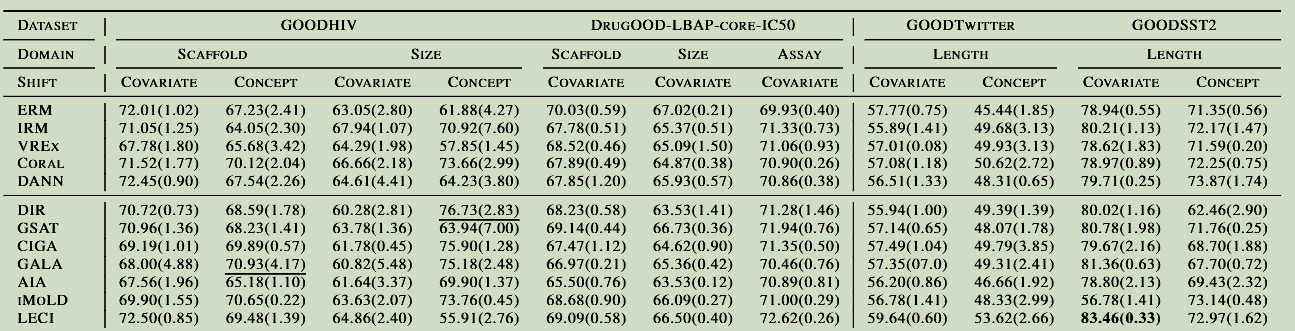
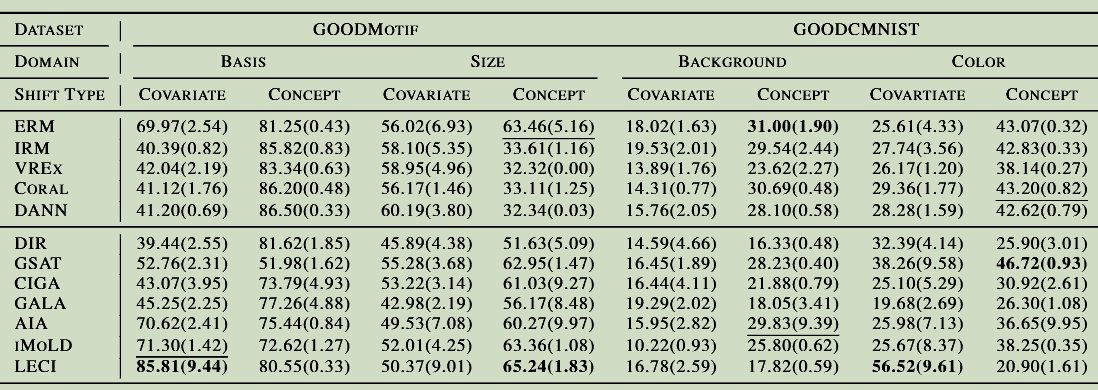

可以看到结果是比较正常的。因为iMoLD虽然提出了一些新颖的结构，但在总体的复杂度方面是不如LECI的；更重要的是，iMoLD是基于分子图提出的，因此在大部分一般的手工数据集上表现一般，在某些特定数据集上甚至差于传统方法。

## 总结
本次将iMoLD复现到了LECI框架上，并将其作为baseline进行了评估。评估结果显示，标准的LECI仍然具有优势，而iMoLD虽然的确基于分子图提出了较为新颖的结构，但限于其模型复杂度和分子图明显的特征，反而在泛化至一般的图结构时，会出现一些落后。**当然，我们也不能否认iMoLD在分子学习领域的优势地位，但泛用性更强，理论更加复杂的LECI显然是处理大部分图的OOD问题的较优解。**